In [1]:
import pandas as pd
import nba_api
import os
from sqlalchemy import create_engine

In [5]:
game_ids.iloc[:]

,index,GAME_ID,GAME_DATE,HOME_TEAM_NAME,AWAY_TEAM_NAME
0,0,0022100602,2022-01-09,Brooklyn Nets,San Antonio Spurs
1,1,0022100597,2022-01-09,LA Clippers,Atlanta Hawks
2,2,0022100599,2022-01-09,Toronto Raptors,New Orleans Pelicans
3,3,0022100598,2022-01-09,Washington Wizards,Orlando Magic
4,4,0022100601,2022-01-09,Oklahoma City Thunder,Denver Nuggets
...,...,...,...,...,...
585,585,0022100003,2021-10-20,Indiana Pacers,Charlotte Hornets
586,586,0022100010,2021-10-20,San Antonio Spurs,Orlando Magic
587,587,0022100005,2021-10-20,Boston Celtics,New York Knicks
588,588,0022100008,2021-10-20,Minnesota Timberwolves,Houston Rockets


In [3]:
from data_warehouse.utils import queries, db_paths
import pandas as pd
game_ids = pd.read_sql(queries["game_ids"], db_paths["games_db"], parse_dates=["GAME_DATE"])

In [2]:
df = pd.read_csv("data_warehouse/play_by_play.csv").iloc[:,1:]

In [18]:
df.columns

Index(['actionNumber', 'clock', 'timeActual', 'period', 'periodType',
       'actionType', 'subType', 'qualifiers', 'personId', 'x', 'y',
       'possession', 'scoreHome', 'scoreAway', 'edited', 'orderNumber',
       'xLegacy', 'yLegacy', 'isFieldGoal', 'side', 'description',
       'personIdsFilter', 'teamId', 'teamTricode', 'descriptor',
       'jumpBallRecoveredName', 'jumpBallRecoverdPersonId', 'playerName',
       'playerNameI', 'jumpBallWonPlayerName', 'jumpBallWonPersonId',
       'jumpBallLostPlayerName', 'jumpBallLostPersonId', 'shotDistance',
       'shotResult', 'shotActionNumber', 'reboundTotal',
       'reboundDefensiveTotal', 'reboundOffensiveTotal', 'officialId',
       'foulPersonalTotal', 'foulTechnicalTotal', 'foulDrawnPlayerName',
       'foulDrawnPersonId', 'turnoverTotal', 'pointsTotal',
       'assistPlayerNameInitial', 'assistPersonId', 'assistTotal',
       'blockPlayerName', 'blockPersonId', 'stealPlayerName', 'stealPersonId',
       'value'],
      dtype='obje

In [39]:
df["side"].fillna(method="ffill").plot()

TypeError: no numeric data to plot

<AxesSubplot:>

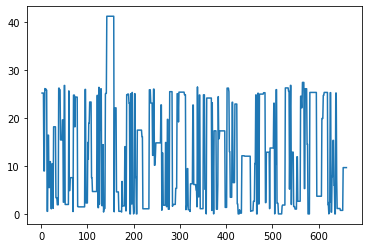

In [17]:
df.shotDistance.fillna(method="ffill").plot()

In [23]:
away_team, home_team = "LA Clippers","Phoenix Suns"

game_ids

,GAME_ID,GAME_DATE,HOME_TEAM_NAME,AWAY_TEAM_NAME
0,0022100163,2022-01-06,Phoenix Suns,LA Clippers
1,0022100039,2022-01-06,Phoenix Suns,LA Clippers
2,0022100239,2022-01-06,Golden State Warriors,New Orleans Pelicans
3,0022100571,2022-01-06,Golden State Warriors,New Orleans Pelicans
4,0022100372,2022-01-06,Detroit Pistons,Memphis Grizzlies
...,...,...,...,...
590,0022100598,2022-01-08,LA Clippers,Memphis Grizzlies
591,0022100583,2022-01-08,LA Clippers,Memphis Grizzlies
592,0022100604,2022-01-08,Utah Jazz,Indiana Pacers
593,0022100593,2022-01-08,Utah Jazz,Indiana Pacers


In [41]:

from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

In [42]:
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2021-22', 
                                              league_id_nullable='00', 
                                              season_type_nullable='Regular Season')

In [43]:
database_path = os.environ["SP_DATA_WAREHOUSE_PATH"] + "databases/"
season = "2021-22"
league_id = "00"
season_type = "Regular Season"

In [46]:
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season, league_id_nullable=league_id, season_type_nullable=season_type)
games = gamefinder.get_data_frames()[0]
# game_ids = pd.DataFrame()
# game_ids["GAME_ID"] = games["GAME_ID"].unique()
# db_name = f"sqlite:///{database_path}games_db_TEST.db"
# db_engine = create_engine(db_name)
# game_ids.to_sql("GAMES_ID", db_engine, index=False, if_exists="append")

In [45]:
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612751,BKN,Brooklyn Nets,0022100602,2022-01-09,BKN vs. SAS,W,264,121,...,0.864,13,42,55,26,8,8,21,18,2.0
1,22021,1610612759,SAS,San Antonio Spurs,0022100602,2022-01-09,SAS @ BKN,L,265,119,...,0.778,12,32,44,33,12,8,15,19,-2.0
2,22021,1610612746,LAC,LA Clippers,0022100597,2022-01-09,LAC vs. ATL,W,238,106,...,0.857,13,34,47,24,5,4,12,18,13.0
3,22021,1610612737,ATL,Atlanta Hawks,0022100597,2022-01-09,ATL @ LAC,L,238,93,...,0.842,6,33,39,19,6,2,13,14,-13.0
4,22021,1610612761,TOR,Toronto Raptors,0022100599,2022-01-09,TOR vs. NOP,W,240,105,...,0.950,15,31,46,18,8,3,12,20,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,22021,1610612741,CHI,Chicago Bulls,0022100004,2021-10-20,CHI @ DET,W,239,94,...,0.867,9,39,48,18,8,5,17,19,6.0
1186,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,121,...,0.833,9,41,50,30,9,2,17,18,7.0
1187,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,241,114,...,0.474,5,40,45,21,7,4,17,25,-7.0
1188,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,239,127,...,0.778,13,41,54,25,8,9,7,19,23.0


In [31]:
games.columns
games[["TEAM_ID", "TEAM_ABBREVIATION", "TEAM_NAME"]]

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME
0,1610612766,CHA,Charlotte Hornets
1,1610612765,DET,Detroit Pistons
2,1610612753,ORL,Orlando Magic
3,1610612755,PHI,Philadelphia 76ers
4,1610612764,WAS,Washington Wizards
...,...,...,...
1127,1610612755,PHI,Philadelphia 76ers
1128,1610612744,GSW,Golden State Warriors
1129,1610612747,LAL,Los Angeles Lakers
1130,1610612749,MIL,Milwaukee Bucks


In [28]:
games["MATCHUP"][0].split("vs.")

['CHA ', ' DET']